In [1]:
import pandas as pd
import seaborn  as sns
from collections import  Counter

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# 1. Exploratory Data Analysis

In [2]:
dataset = pd.read_csv("../data/dataset.csv")
dataset.head()

,text,date,category,language
0,"Hello, Does it matter iff I use Visa or Master...",7-6-2022,visa_or_mastercard,en
1,"Good afternoon, I just got refunded for my pur...",16-11-2022,reverted_card_payment?,en
2,"Hello, I got billed ann extra pound! Thanks",4-12-2022,extra_charge_on_statement,en
3,"Hi, How long does it take for a transfer to sh...",23-11-2022,transfer_timing,en
4,"hi, When can I use money sent to my accountt? ...",17-4-2022,transfer_timing,en


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9375 entries, 0 to 9374
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9373 non-null   object
 1   date      9373 non-null   object
 2   category  9373 non-null   object
 3   language  9373 non-null   object
dtypes: object(4)
memory usage: 293.1+ KB


##### To make sure there is no NaN or duplicated text 

In [4]:
dataset = dataset.dropna()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9373 entries, 0 to 9374
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9373 non-null   object
 1   date      9373 non-null   object
 2   category  9373 non-null   object
 3   language  9373 non-null   object
dtypes: object(4)
memory usage: 366.1+ KB


In [6]:
dataset = dataset.drop_duplicates()

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9372 entries, 0 to 9374
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      9372 non-null   object
 1   date      9372 non-null   object
 2   category  9372 non-null   object
 3   language  9372 non-null   object
dtypes: object(4)
memory usage: 366.1+ KB


In [8]:
dataset.category.value_counts()

direct_debit_payment_not_recognised                 174
card_payment_fee_charged                            173
declined_cash_withdrawal                            166
balance_not_updated_after_cheque_or_cash_deposit    165
wrong_amount_of_cash_received                       165
                                                   ... 
card_acceptance                                      61
card_swallowed                                       60
virtual_card_not_working                             40
contactless_not_working                              37
account_support                                      34
Name: category, Length: 78, dtype: int64

##### Class Mapping

In [9]:
mapping = pd.read_csv("../data/mapping.csv")
mapping.head()

,category,class
0,card_arrival,card
1,card_linking,card
2,exchange_rate,others
3,card_payment_wrong_exchange_rate,card
4,extra_charge_on_statement,others


In [10]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  77 non-null     object
 1   class     77 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [11]:
mapping["class"].unique()

array(['card', 'others', 'cash', 'security', 'transfer'], dtype=object)

In [12]:
# mapping into dictionary
mapping_dict = dict(zip(mapping["category"], mapping["class"]))
mapping_dict

{'card_arrival': 'card',
 'card_linking': 'card',
 'exchange_rate': 'others',
 'card_payment_wrong_exchange_rate': 'card',
 'extra_charge_on_statement': 'others',
 'pending_cash_withdrawal': 'cash',
 'fiat_currency_support': 'others',
 'card_delivery_estimate': 'card',
 'automatic_top_up': 'others',
 'card_not_working': 'card',
 'exchange_via_app': 'others',
 'lost_or_stolen_card': 'card',
 'age_limit': 'others',
 'pin_blocked': 'security',
 'contactless_not_working': 'others',
 'top_up_by_bank_transfer_charge': 'transfer',
 'pending_top_up': 'others',
 'cancel_transfer': 'transfer',
 'top_up_limits': 'others',
 'wrong_amount_of_cash_received': 'cash',
 'card_payment_fee_charged': 'card',
 'transfer_not_received_by_recipient': 'transfer',
 'supported_cards_and_currencies': 'card',
 'getting_virtual_card': 'card',
 'card_acceptance': 'card',
 'top_up_reverted': 'others',
 'balance_not_updated_after_cheque_or_cash_deposit': 'cash',
 'card_payment_not_recognised': 'card',
 'edit_personal_

In [13]:
def class_mapping(category):
    class_ = ''
    if category in mapping_dict:
        class_ = mapping_dict[category]
        
    return class_

In [14]:
dataset["class"] = dataset["category"].apply(class_mapping)
dataset.head()

,text,date,category,language,class
0,"Hello, Does it matter iff I use Visa or Master...",7-6-2022,visa_or_mastercard,en,card
1,"Good afternoon, I just got refunded for my pur...",16-11-2022,reverted_card_payment?,en,card
2,"Hello, I got billed ann extra pound! Thanks",4-12-2022,extra_charge_on_statement,en,others
3,"Hi, How long does it take for a transfer to sh...",23-11-2022,transfer_timing,en,transfer
4,"hi, When can I use money sent to my accountt? ...",17-4-2022,transfer_timing,en,transfer


In [15]:
dataset.to_csv("../aux_data/mapped_dataset.csv", index=False)

OSError: Cannot save file into a non-existent directory: '..\aux_data'

##### See if all categories are mapped

In [ ]:
dataset["class"].unique()

In [ ]:
len(dataset["category"].unique())

In [ ]:
len(mapping["category"].unique())

In [ ]:
dataset[dataset["class"] == ""]

##### Distribution of the categories by date

In [20]:
dataset.groupby(["date", "category"])['text'].count()

date      category                          
1-1-2022  activate_my_card                      1
          beneficiary_not_allowed               1
          card_payment_fee_charged              2
          card_payment_not_recognised           1
          cash_withdrawal_charge                1
                                               ..
9-9-2022  top_up_limits                         1
          transaction_charged_twice             1
          transfer_not_received_by_recipient    2
          unable_to_verify_identity             2
          verify_source_of_funds                1
Name: text, Length: 7741, dtype: int64

In [21]:
dataset.groupby("category").agg({"date": "nunique"}).sort_values(by="date")

,date
category,
account_support,1
virtual_card_not_working,35
contactless_not_working,35
card_swallowed,53
card_acceptance,57
...,...
balance_not_updated_after_cheque_or_cash_deposit,130
card_payment_fee_charged,131
wrong_amount_of_cash_received,131


#### Text sample

In [22]:
[dataset["text"][i] for i in range(30)]

['Hello, Does it matter iff I use Visa or Mastercard? Thanks',
 'Good afternoon, I just got refunded for my purchase over two weeks ago best Regards',
 'Hello, I got billed ann extra pound! Thanks',
 'Hi, How long does it take for a transfer to show up in my account? Thanks',
 'hi, When can I use money sent to my accountt? best Regards',
 'Hi, My card is about to expire.  Are there any costs with a replacement card?  How quick do you mail it to me? best Regards',
 'Good afternoon, The exchange rate that was applied for an international purchase was wrongg. best Regards',
 "hello, Myy app shows a payment I didn't make thanks",
 "Hello, There is a card payment that I'm not recognizing. Kind Regards",
 'good evening, Do you offer auto top ups? Kind Regards',
 'good afternoon, How do you decide what the exchangee rates are? Best Regards',
 'hi, I made a transfer and was charged extra. Why? best Regards',
 'Good afternoon, I made a payment and it appears it is showing twicee thanks',
 'Good

##### Words exploration

In [23]:
words_array = dataset['text'].str.split().values.tolist()

words_list = []
words_list = [word.lower() for i in words_array for word in i]

In [24]:
counter = Counter(words_list)
most_common_words = counter.most_common()

most_common_words[:20]

[('i', 7091),
 ('regards', 6030),
 ('good', 5428),
 ('my', 4851),
 ('to', 3468),
 ('a', 3082),
 ('kind', 3050),
 ('the', 3021),
 ('thanks', 3015),
 ('best', 2995),
 ('is', 2022),
 ('hello,', 1868),
 ('hi,', 1834),
 ('morning,', 1828),
 ('afternoon,', 1803),
 ('evening,', 1796),
 ('can', 1560),
 ('do', 1520),
 ('card', 1386),
 ('it', 1377)]

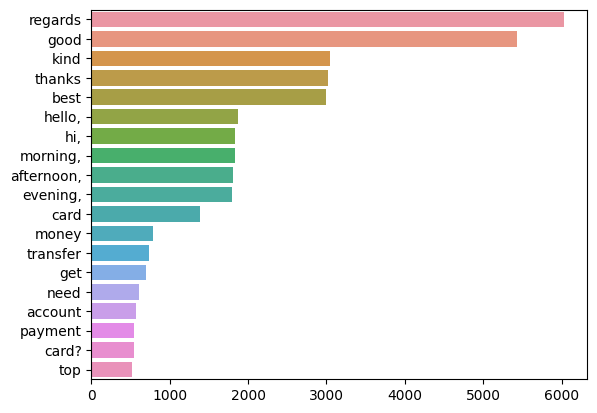

In [25]:
stopwords = stopwords.words('english')

x, y = [], []
for word, count in most_common_words[:50]:
    # remove stopwords
    if (word not in stopwords):
        x.append(word)
        y.append(count)

plot = sns.barplot(x=y, y=x)

##### Distribution of the text by language

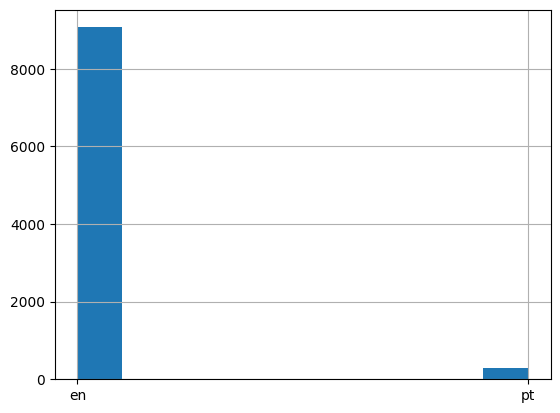

In [26]:
language = dataset.language.hist()

Observations:
    - There are 78 categories, not 77;
    - One of the categories ("account_support") does not exist in the mapping;
    - Category "account_support" seems to be a human error that occurred on 2-2-2022;
    - Emails begin with greetings and end with goodbyes. Since we are talking about emails these words are neither necessary or exclusive to one category;
    - Some emails have misspelled words;
    - There is more than one language in the dataset: en and pt, and it's supposed to be in English only.